# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [12]:
#import sys
#!{sys.executable} -m pip install palmerpenguins

In [13]:
import pandas as pd
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [14]:
penguins_new = pd.get_dummies(penguins, columns= ["species", "island", "sex"], drop_first = True)
penguins_new.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
3,NaN,NaN,NaN,NaN,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

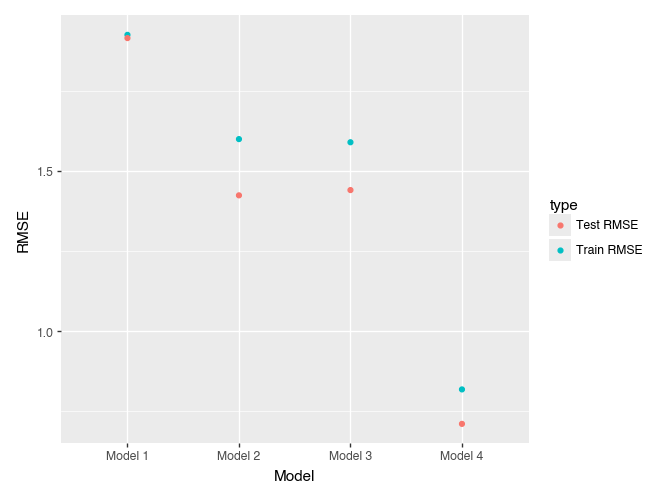

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from plotnine import *

penguins_new = penguins_new.dropna(subset=["bill_depth_mm"])

y = penguins_new["bill_depth_mm"]
X = penguins_new.drop(columns=["bill_depth_mm"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Define models
models = {
    "Model 1": ["bill_length_mm"],
    "Model 2": ["bill_length_mm", "flipper_length_mm"],
    "Model 3": ["bill_length_mm", "flipper_length_mm", "body_mass_g"],
    "Model 4": ["bill_length_mm", "flipper_length_mm", "body_mass_g",
                "species_Chinstrap", "species_Gentoo", "island_Dream",
                "island_Torgersen", "sex_male"]
}

# Training errors
rows = []
for name, Xcols in models.items():
    model = LinearRegression().fit(X_train[Xcols], y_train)
    y_train_ = model.predict(X_train[Xcols])
    train_mse = mean_squared_error(y_train, y_train_)
    rows.append({"Model": name, "Train RMSE": np.sqrt(train_mse)})
train_error = pd.DataFrame(rows)

# Test errors
rows = []
for name, Xcols in models.items():
    model = LinearRegression().fit(X_train[Xcols], y_train)
    y_test_ = model.predict(X_test[Xcols])
    test_mse = mean_squared_error(y_test, y_test_)
    rows.append({"Model": name, "Test RMSE": np.sqrt(test_mse)})
test_error = pd.DataFrame(rows)

# Plot
df_error = train_error.merge(test_error, on="Model")
df_error_long = df_error.melt(id_vars=["Model"], value_name="RMSE", var_name="type")

(ggplot(df_error_long,
        aes(x="Model", y="RMSE", color="type")) +
 geom_point())


Model 4 is the best.